In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [2]:
fits_file = fits.open('asu.fit')

data = fits_file[1].data

hipparcos_id = data['HIP']
magnitude = data['Vmag']
color_index = data['B-V']
parallax = data['Plx']

In [3]:
parallax = np.where(parallax <= 0, 1e-10, parallax)
absolute_magnitude = magnitude - 5 * np.log10(10 / parallax)
temperature = 4600 * ((1 / ((0.92 * color_index) + 1.7)) + (1 / ((0.92 * color_index) + 0.62)))

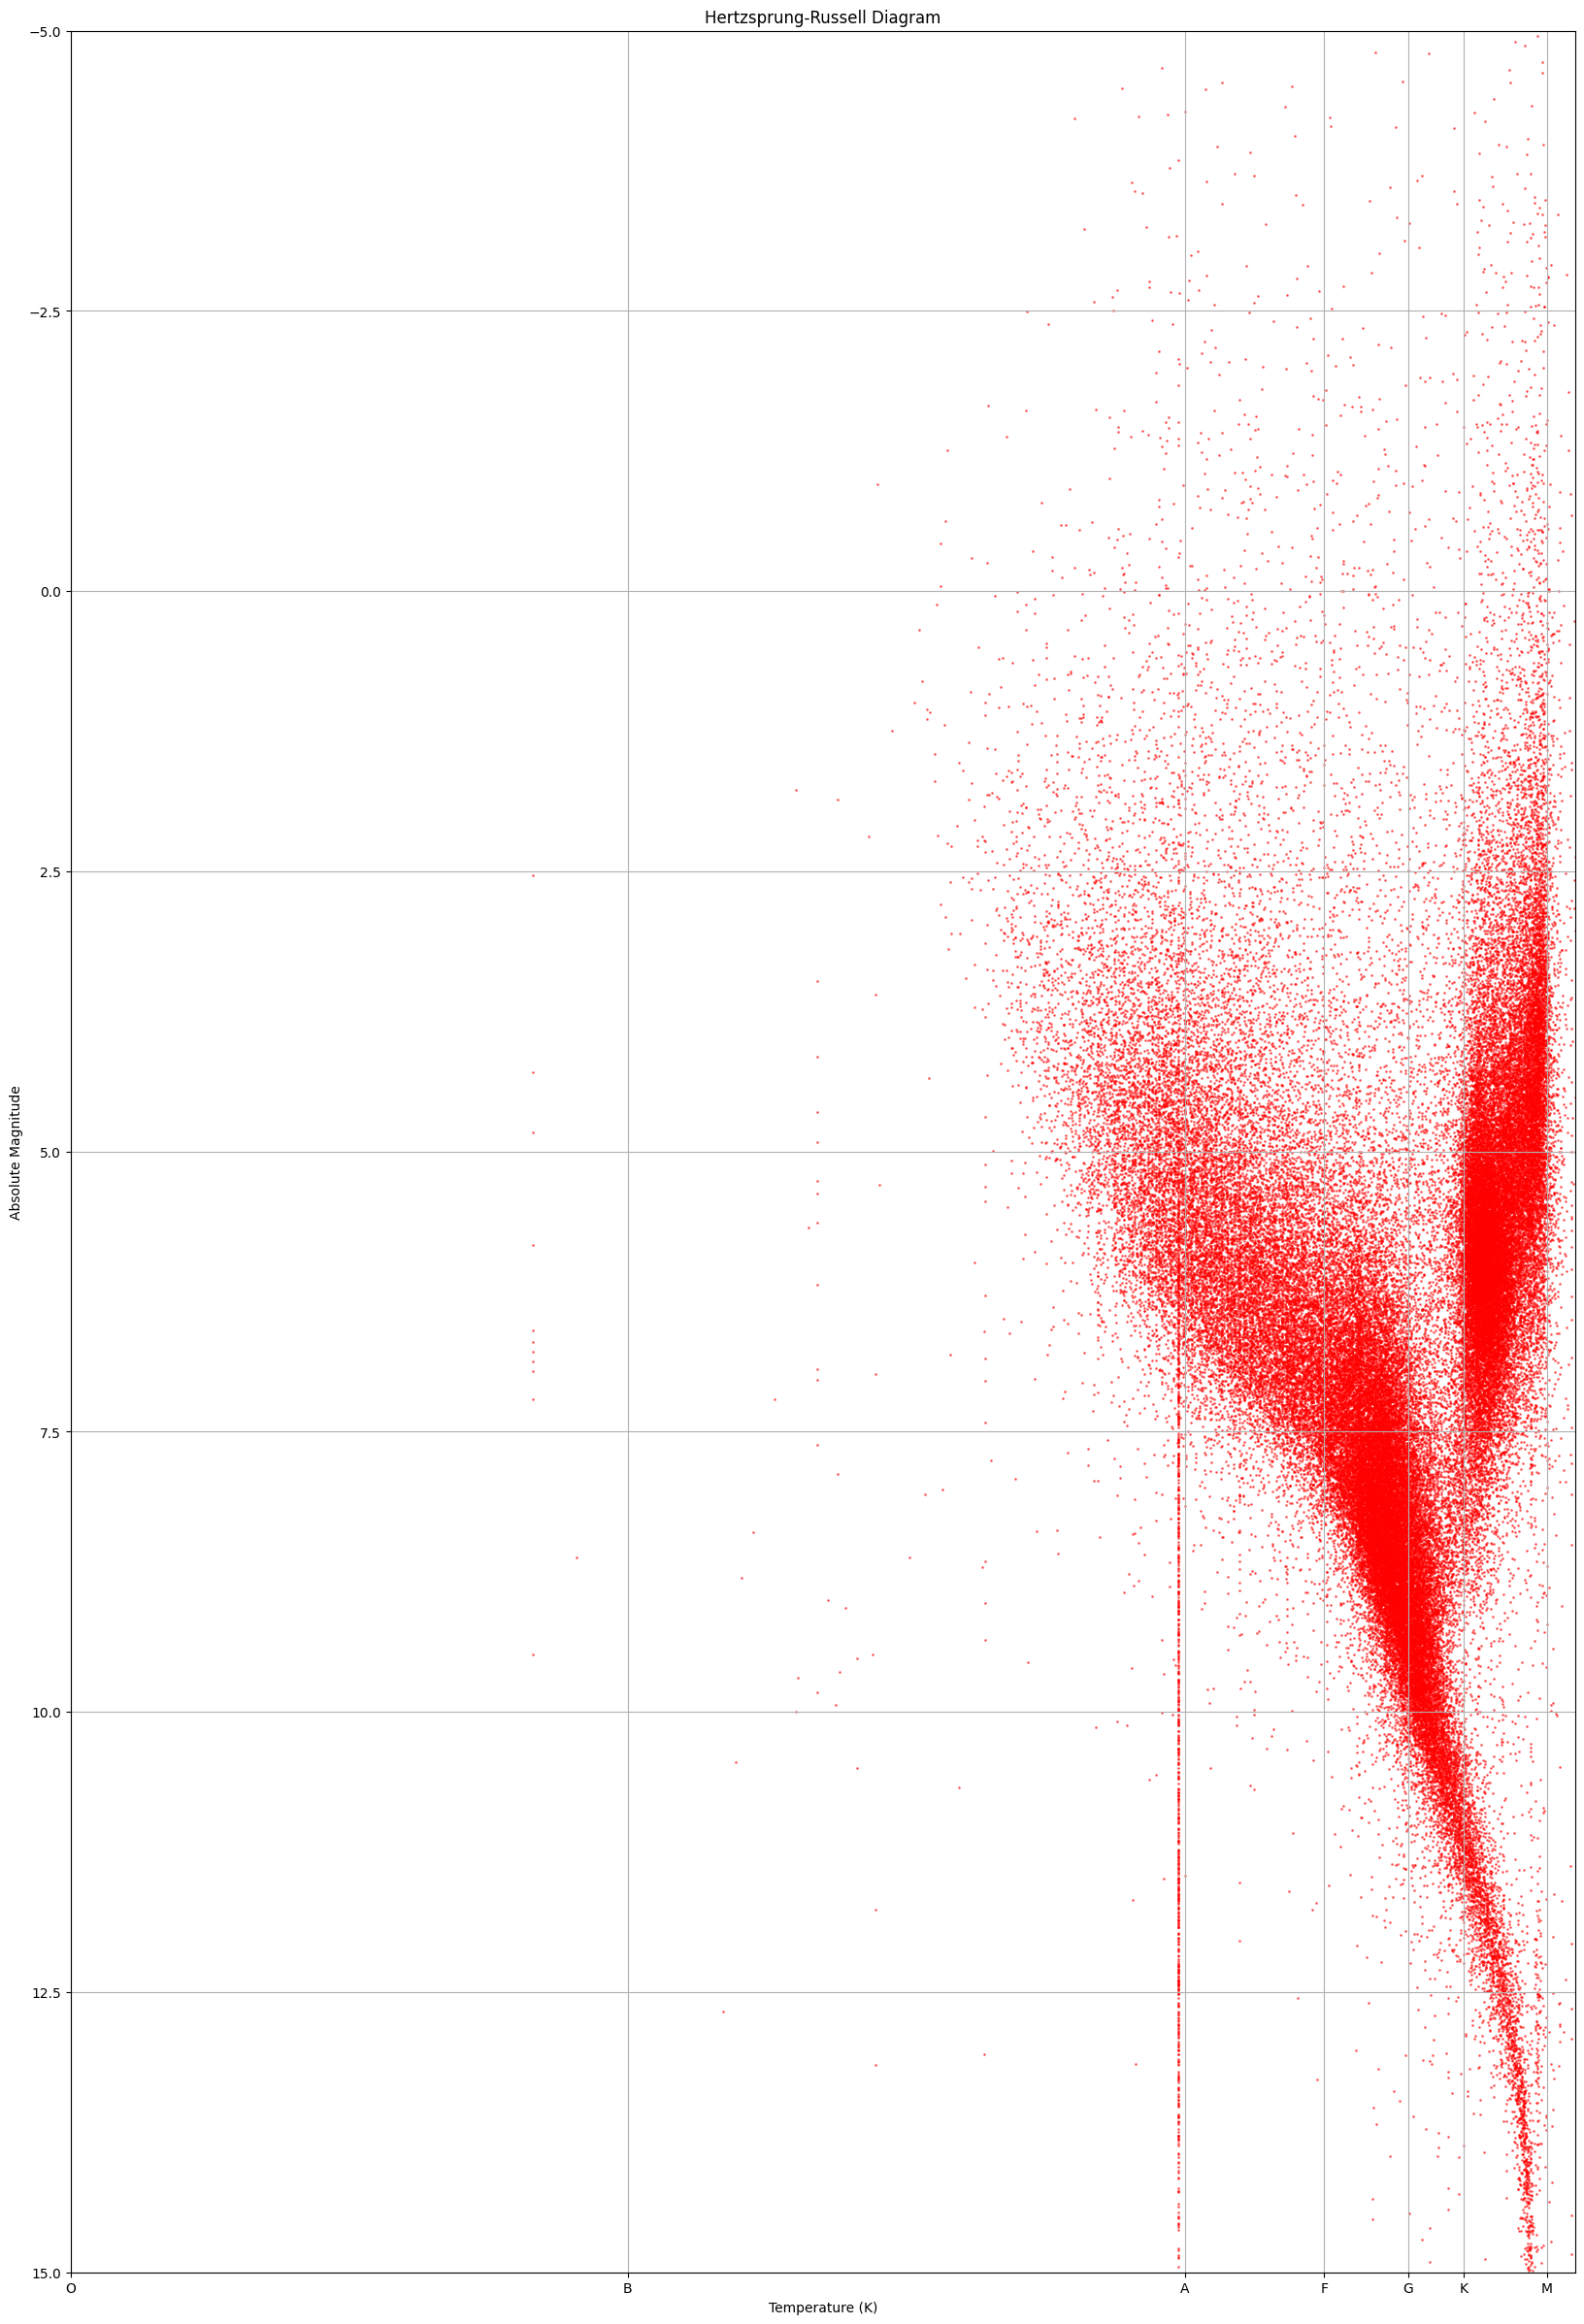

In [4]:
plt.figure(figsize=(20, 30))
plt.scatter(temperature, absolute_magnitude, s=1, c='red', alpha=0.5)
plt.xlim(3000, 30000)
plt.ylim(-5, 15)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude')
plt.title('Hertzsprung-Russell Diagram')
plt.grid(True)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
tick_positions = [30000, 20000, 10000, 7500, 6000, 5000, 3500]
plt.xticks(tick_positions, spectral_types)
fits_file.close()
plt.show()
